## Ficher de scrapping
Pour l'obtention des données, j'ai choisi de faire un scrapping sur Google Images avec différents "search queries" (termes de recherche) pour obtenir des images pouvant être regroupées en deux classes ("plein" et "pas plein").

In [2]:
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [9]:
import base64

# définir le temps d'attente
WAIT_TIME = 5

# Fonction pour la creation d'un dossier de sauvegarde pour les images
def create_dir(directory):
    if os.path.exists(directory):
        print(f"Dossier existant '{directory}', creation de dossier annulée ")
    else:
        os.makedirs(directory)
        print(f"Dossier créé '{directory}.")

def click_on_popup(driver: webdriver, wait_time=WAIT_TIME):

    # click sur le popup (si existant)
    popup_button_ID = 'W0wltc'
    try:
        # Wait for the popup element to become clickable
        popup_button = WebDriverWait(driver, wait_time).until(
            EC.element_to_be_clickable((By.ID, popup_button_ID))
        )
        popup_button.click()
        print("Popup closed successfully.")
    except Exception as e:
        print("No popup appeared or an error occurred:", str(e))

# fonction pour télécharger une image
def download_image(img_src, folder, index):
    response = requests.get(img_src)
    if response.status_code == 200:
        filename = os.path.join(folder, f'image_{index}.jpeg')
        print('filename:', filename)
        with open(filename, 'wb') as f:
            f.write(response.content)

        print(f'url downloaded image {index}', img_src)
    else:
        print(f"Failed to retrieve image: {img_src}")

# fonction pour télécharger des images BLOB
def download_data_image(data_url, folder, index):
    # Split the data URL to extract the base64 part
    header, base64_str = data_url.split(',', 1)  # Split only on the first comma

    # Decode the base64 string
    image_data = base64.b64decode(base64_str)

    # Set the full path for the output file
    filename = f'image_{index}.jpeg'
    file_path = os.path.join(folder, filename)

    # Write the binary data to a file
    with open(file_path, 'wb') as img_file:
        img_file.write(image_data)


    print(f'url downloaded image {index}', data_url)
    # print(f"Downloaded image to: {file_path}")

def download_all_images(download_folder, driver: webdriver, index_init=1):
    parent_div_class = 'q1MG4e mNsIhb' # only non-licensable images
    parent_div_class = 'q1MG4e tb08Pd' # only licensable images
    parent_div_class = 'q1MG4e' # all images
    img_class = 'YQ4gaf'

    # séléction précise des images
    images = driver.find_elements(By.CSS_SELECTOR, 'div.H8Rx8c>div.q1MG4e>img.YQ4gaf')

    # index pour nommer les images selon lèordre de téléchargement
    index = index_init
    for img in images:
        img_src = img.get_attribute('src')
        # print(f'url image {index}', img_src)
        if img_src:  # Ensure we have a valid URL
            if img_src.startswith("data:image"):
                if not ('gif' in img_src):
                    print('Image fit for download: ', img_src)
                    download_data_image(img_src, download_folder, index)
                    index += 1
                else:
                    pass
                    # print('data:image not needed for download: ', img_src)
            else:
                    download_image(img_src, download_folder, index)
                    index += 1


In [19]:
from selenium.common import NoSuchElementException

image_class = 'YQ4gaf'
wait_time = 3

# La fonction principale pour scrapper les images à partir de Google Images
def scrape_google_images(search_query, download_folder):
    create_dir(download_folder)

    # Initialize the Selenium WebDriver
    driver = webdriver.Chrome()
    driver.get(f"https://www.google.com/search?hl=en&tbm=isch&q={search_query}")

    # Allow the page to load
    time.sleep(WAIT_TIME)  # Adjust based on your internet speed

    try:
        if driver.find_element(By.ID, 'W0wltc'):
            click_on_popup(driver, wait_time)
    except NoSuchElementException:
            print("Element not found.")

    # scroll vers le bas pour charger toutes les images possibles
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        # Scroll down to load more images
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(wait_time)

        # Get new height after scrolling
        new_height = driver.execute_script("return document.body.scrollHeight")

        # Check if the page height has changed
        if new_height == last_height:
            print("No more images to load.")
            break

        last_height = new_height

    download_all_images(download_folder, driver, index_init=960) # index_init est à définir manuellement

    # Close the driver
    driver.quit()

Directory 'google_images/full2' already exists, skipping creation.
Popup closed successfully.
No more images to load.
Image fit for download:  
url downloaded image 960 
Image fit for download:  
url downloaded image 961 
Image fit for download:  
url downloaded image 962 
Image fit for download:  
url downloaded image 963 
Image fit for download:  
url downloaded image 964 
Image fit for download:  
url downloaded image 965 
Image fit for download:  
url downloaded image 966 
Image fit for download:  
url downloaded image 967 
Image fit for download:  
url downloaded image 968 
Image fit for download:  
url downloaded image 969 
Image fit for download:  
url downloaded image 970 
Image fit for download:  
url downloaded image 971 
Image fit for download:  
url downloaded image 972 
Image fit for download:  
url downloaded image 973 
Image fit for download:  
url downloaded image 974 
Image fit for download:  
url downloaded image 975 
Image fit for download:  
url downloaded image 976
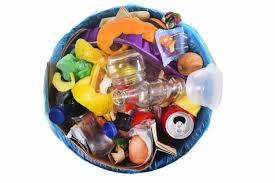
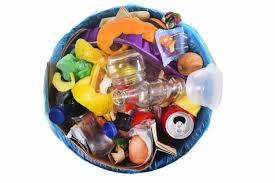
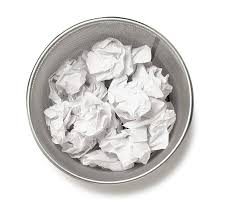
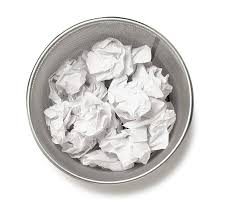
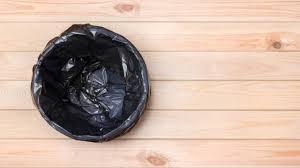
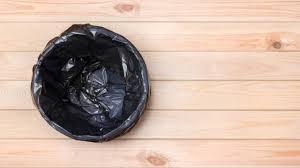
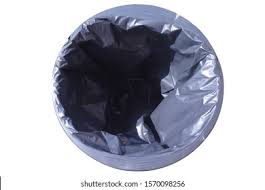
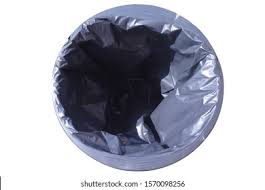
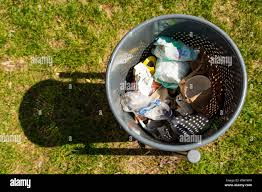
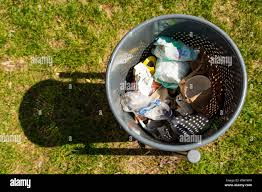
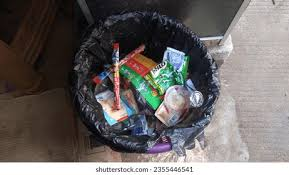
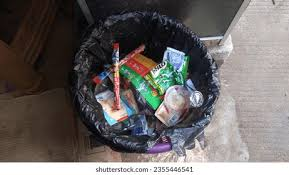
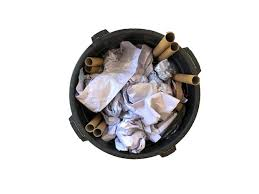
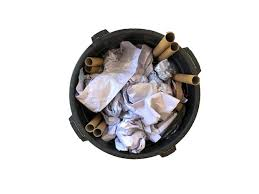
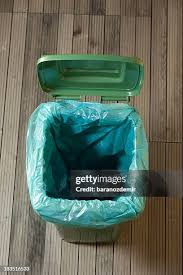
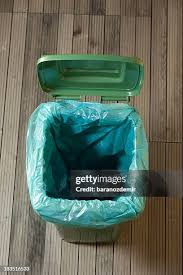
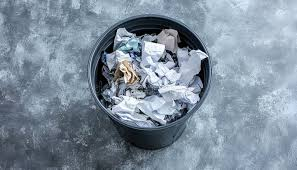
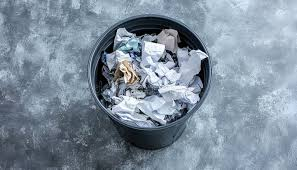
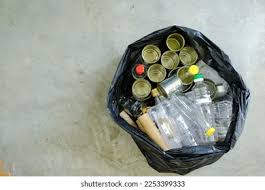
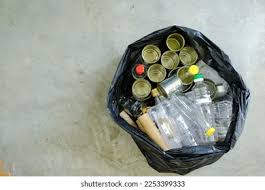
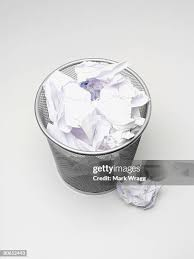
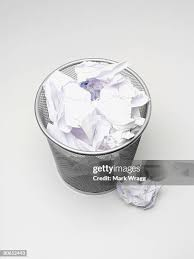
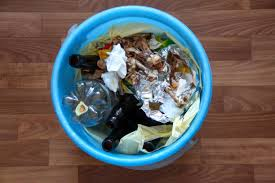
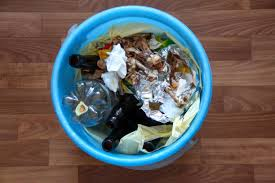
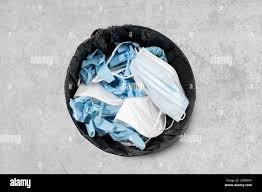
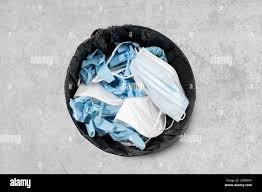
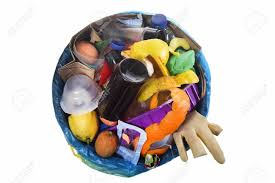
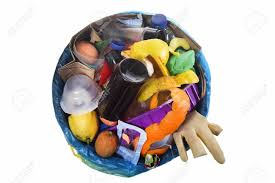
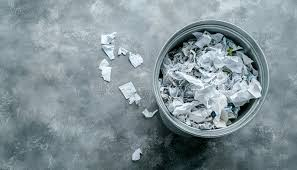
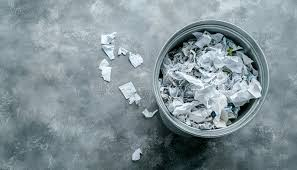
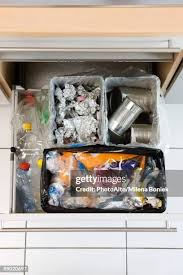
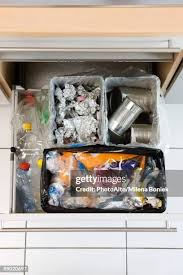
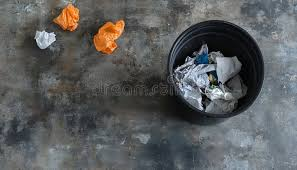
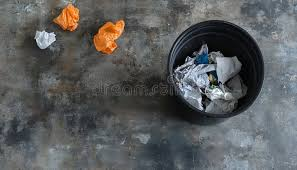
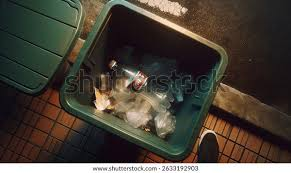
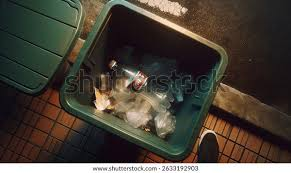
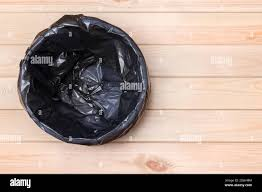
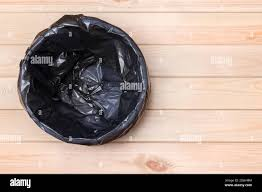
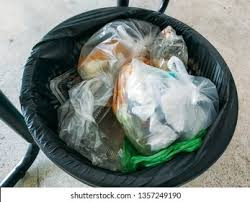
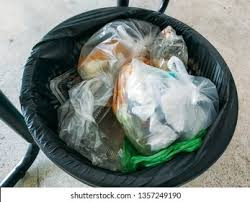
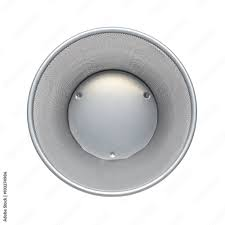
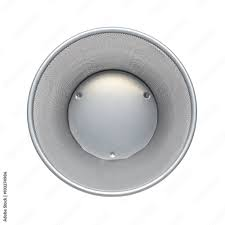
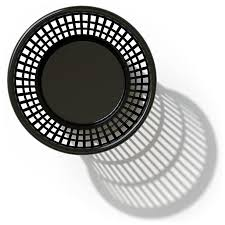
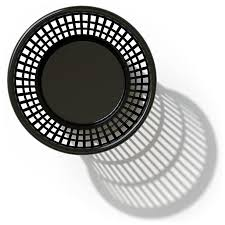
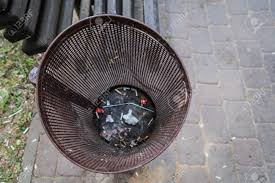
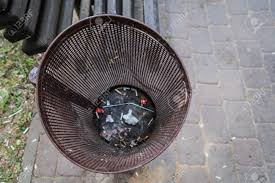
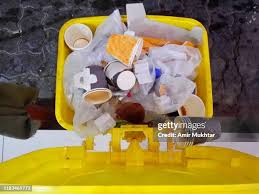
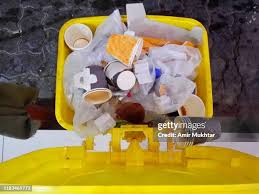
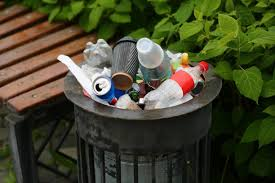
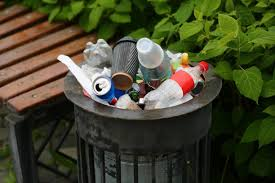
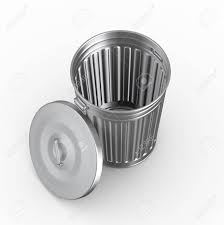
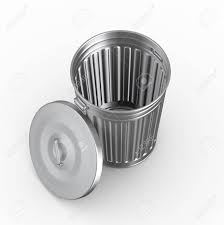
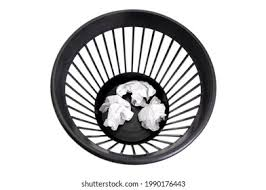
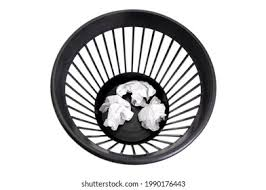
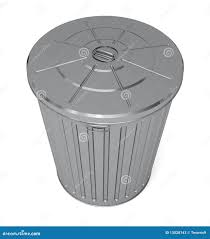
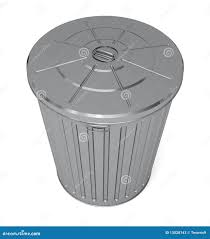
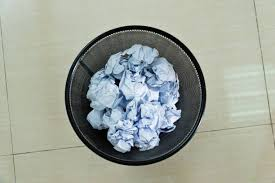
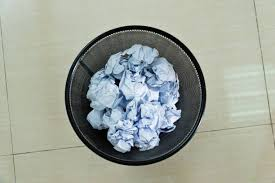
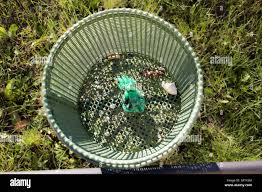
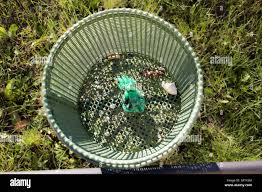
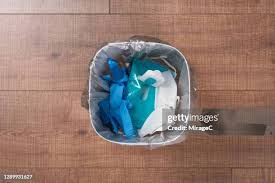
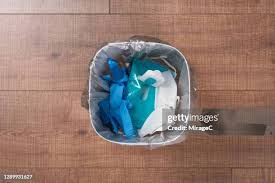
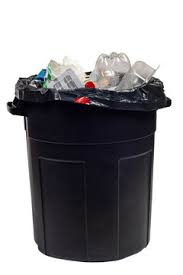
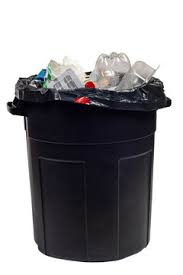
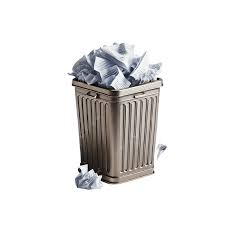
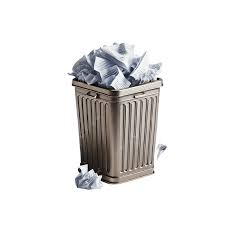
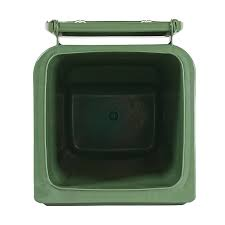
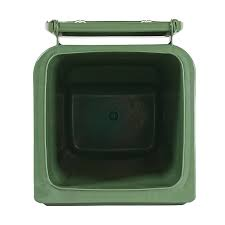

In [20]:
 # Search query string for Google Images
 # À définir manuellement après avoir testé et vérifier que les images rendues par la recherche correspondent bien au besoin


search_query = 'waste container full of trash'
search_query = 'waste container empty'
search_query = 'trash can full'
search_query = 'trash can empty'
search_query = 'top view trash can empty'
search_query = 'top view trash can full'

# Dossiers de sauvegarde des images
# (à noter que les images doivent être regroupées dans un nombre de dossiers correspondant au nombre de classes désirées)

download_folder = 'google_images/full'
download_folder = 'google_images/empty'
download_folder = 'google_images/full1'
download_folder = 'google_images/empty2'
download_folder = 'google_images/full2'

# appel de la fonction
scrape_google_images(search_query, download_folder)